In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from obspy import Trace, Stream, read
import scipy
from scipy.integrate import cumtrapz
from scipy.fftpack import fft, ifft, fft2, ifft2, fftshift, ifftshift, fftfreq
from scipy import signal
from scipy import ndimage
import math
from math import ceil
from multitaper import MTSpec

import transferfns as tf

%load_ext autoreload
%autoreload 2

In [2]:
# Define directories and file names
datadir = "data/"
event_ps1_way = {"geo": ("20190427202045.868.segy", 24270), "das": ("DAS_FORGE_201904272020575.segy",9150)}

In [3]:
fpath_ps1_geo = datadir + "/" + event_ps1_way["geo"][0]
st_ps1_geo = read(fpath_ps1_geo, format='SEGY', unpack_trace_headers=True)
print(st_ps1_geo)

# Apply conversion factor, filter and integrate to velocity or displacement
convert_factor = 2.333*pow(10,-7)

for tr in st_ps1_geo:
    tr.data=tr.data*convert_factor
    median = np.median(tr.data,axis=0)
    tr.data=tr.data-median
    tr.filter(type='bandpass',freqmin=5,freqmax=250)
    
    # Velocity
    tr.integrate(method='cumtrapz')
    tr.stats.units="Velocity"

st_geo_dis=tf.to_displacement(st_ps1_geo)

36 Trace(s) in Stream:

Seq. No. in line:    0 | 2019-04-27T20:20:45.000000Z - 2019-04-27T20:21:00.999500Z | 2000.0 Hz, 32000 samples
...
(34 other traces)
...
Seq. No. in line:    0 | 2019-04-27T20:20:45.000000Z - 2019-04-27T20:21:00.999500Z | 2000.0 Hz, 32000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


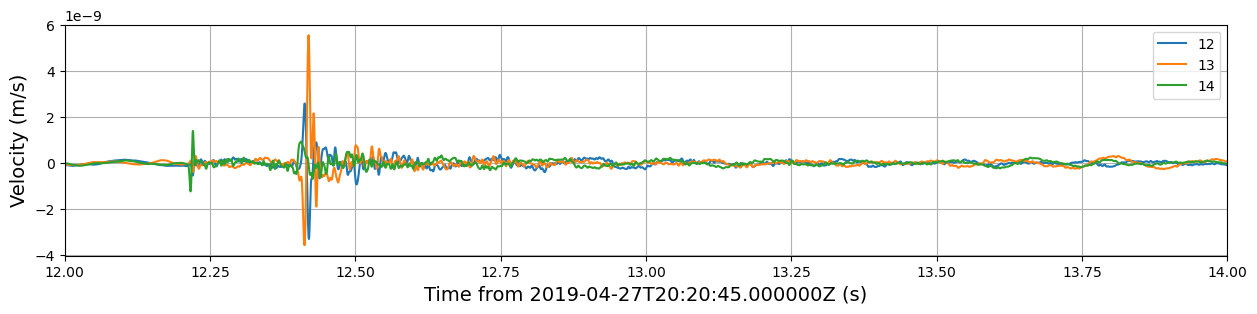

In [42]:

plt.figure(figsize=[15,3])

for trace in [12,13,14]:
# print('Event depth %s' %(st_ps1_geo[trace].stats.segy['trace_header']['receiver_group_elevation']/100))
# start=st_geo_dis[trace].stats.starttime

    plt.plot(st_geo_dis[trace].times(),st_geo_dis[trace].data,label=trace)

plt.xlim(12,14)
plt.xlabel('Time from %s (s)'%(start),fontsize=14)
# plt.ylabel('Displacement (m)',fontsize=14)
plt.ylabel('Velocity (m/s)',fontsize=14)
plt.legend()
plt.grid()
plt.show()

## Calculate MW from s-wave arrival

Event depth 767.2


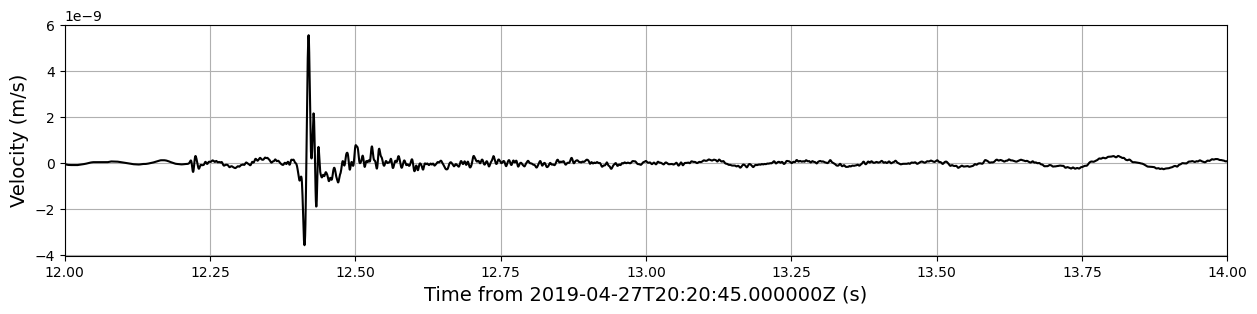

In [26]:
trace=13
print('Event depth %s' %(st_ps1_geo[trace].stats.segy['trace_header']['receiver_group_elevation']/100))
start=st_geo_dis[trace].stats.starttime

plt.figure(figsize=[15,3])
plt.plot(st_geo_dis[trace].times(),st_geo_dis[trace].data,'k')

plt.xlim(12,14)
plt.xlabel('Time from %s (s)'%(start),fontsize=14)
# plt.ylabel('Displacement (m)',fontsize=14)
plt.ylabel('Velocity (m/s)',fontsize=14)

plt.grid()
plt.show()

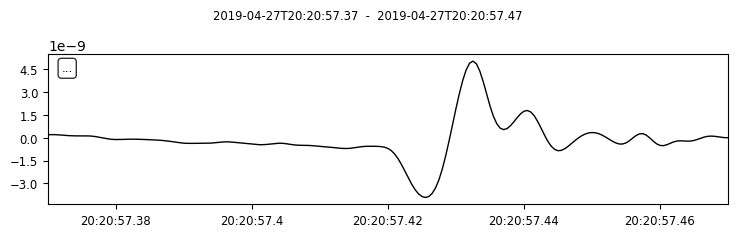

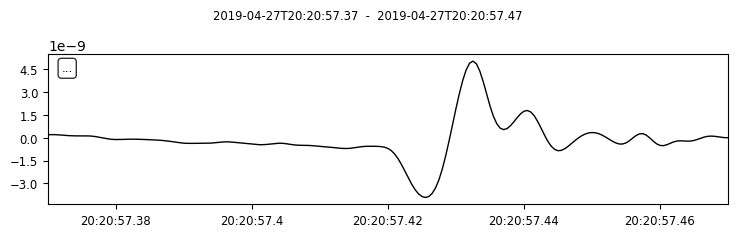

In [24]:
start=st_geo_dis[trace].stats.starttime
st_slice=st_geo_dis[trace].slice(start+12.37,start+12.47)
st_slice.plot()

/Users/ab14785/Library/CloudStorage/OneDrive-UniversityofBristol/01-Coding/6-Github_repos/FORGE/FORGE_Transfer-fn/transferfns.py:375: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,500)


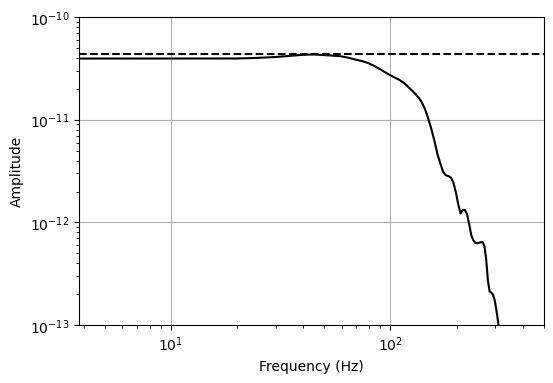

Seismic Moment = 94525650.96059175
Moment Magnitude = -0.6829668820944192


In [25]:
amp_max=tf.mtspec(st_slice)
# Density
rho=2500
# S-wave velocity
vs=3100
# Distance in meters
r=1400
# Radiation pattern for a S-wave
R=0.6
# Free air correction. Borehole recording therefore 1?
F=1

omega_0=amp_max

M_0=((4.*np.pi*rho*(vs**3)*r*(omega_0))/(R*F))
print('Seismic Moment = %s'%M_0)


M_W=((2./3.0)*np.log10(M_0))-6.0
print('Moment Magnitude = %s'%M_W)

## Calculate MW from P-wave

Event depth 767.2


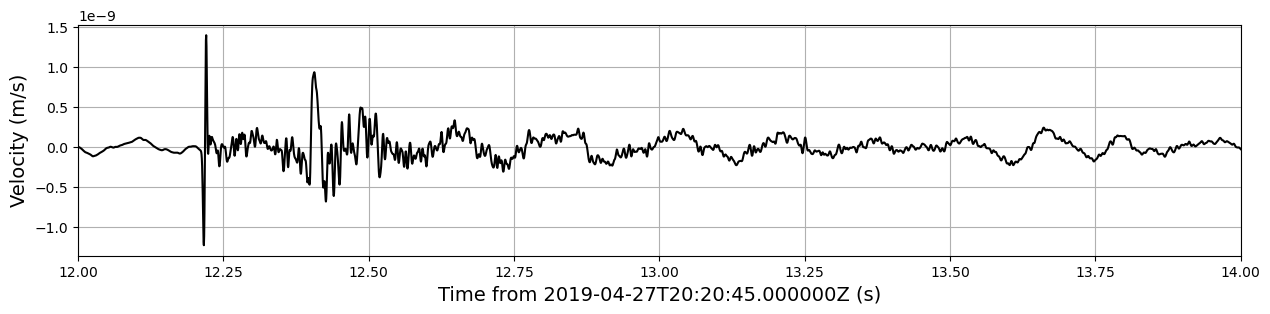

In [30]:
trace=14
print('Event depth %s' %(st_ps1_geo[trace].stats.segy['trace_header']['receiver_group_elevation']/100))
start=st_geo_dis[trace].stats.starttime

plt.figure(figsize=[15,3])
plt.plot(st_geo_dis[trace].times(),st_geo_dis[trace].data,'k')

plt.xlim(12,14)
plt.xlabel('Time from %s (s)'%(start),fontsize=14)
# plt.ylabel('Displacement (m)',fontsize=14)
plt.ylabel('Velocity (m/s)',fontsize=14)

plt.grid()
plt.show()

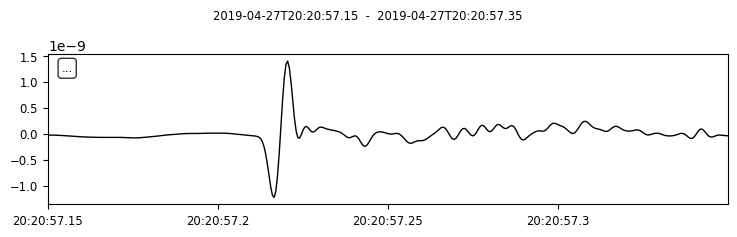

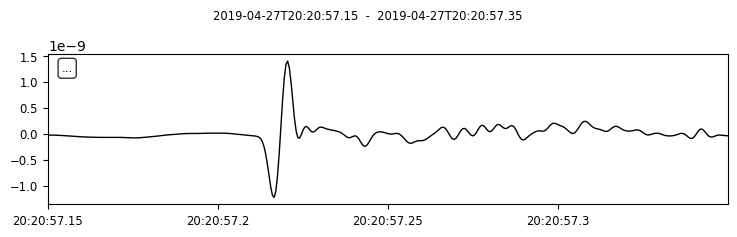

In [36]:
start=st_geo_dis[trace].stats.starttime
st_slice=st_geo_dis[trace].slice(start+12.15,start+12.35)
st_slice.plot()

/Users/ab14785/Library/CloudStorage/OneDrive-UniversityofBristol/01-Coding/6-Github_repos/FORGE/FORGE_Transfer-fn/transferfns.py:375: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,500)


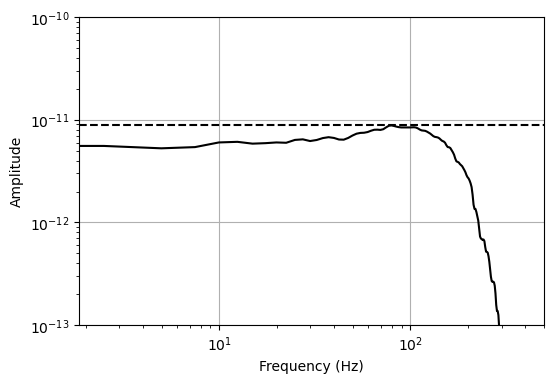

Seismic Moment = 26254087.244144898
Moment Magnitude = -1.0538687172666297


In [37]:
amp_max=tf.mtspec(st_slice)
# Density
rho=2500
# S-wave velocity
vs=3100
# Distance in meters
r=1400
# Radiation pattern for a P-wave
R=0.44
# Free air correction. Borehole recording therefore 1?
F=1

omega_0=amp_max

M_0=((4.*np.pi*rho*(vs**3)*r*(omega_0))/(R*F))
print('Seismic Moment = %s'%M_0)


M_W=((2./3.0)*np.log10(M_0))-6.0
print('Moment Magnitude = %s'%M_W)